# [NLP] Assignment 1: Tokenization

In this assignment, you need to tokenize the text of the Twitter(X) users posts(tweets). The assignment consists of two tasks. When you finish all the tasks, create a GitHub repository for this assignment (you can use this repo later for the other assignments) and submit this notebook in the repository. Leave `requirements.txt` file if your code requires additional installations. Submit the link to the repository in Moodle.

The [data](https://drive.google.com/file/d/15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw/view?usp=share_link) contains 5 files whereby each contains 44 tweets. Each tweet is separated by a newline.

## Task 1. Tokenize some tweets manually (20 points)

As a first task you need to tokenize first 15 tweets from `file2` by hand. This will allow you to understand the problem from a linguistic point of view. The guidelines for tweet tokenization are as follows:

- Each smiley is a separate token
- Each hashtag is an individual token. Each user reference is an individual token
- If a word has spaces between them then it is converted to a single token
- All punctuations are individual tokens. This includes double-quotes and single quotes also
- A URL is a single token

<!-- Example of output -->
<!-- 
    Input tweet
    @xfranman Old age has made N A T O!

    Tokenized tweet (separated by comma)
    @xfranman , Old , age , has , made , NATO , ! -->


    1. Input tweet
    Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com
    1. Tokenized tweet
    Camping , in , Maine , for , the , weekend , . , Hey , Dad , , , Mama , Loves , YOU , : , http://www.mamapalooza.com

    2. Input tweet
    Its american tradition bitch
    2. Tokenized tweet
    Its , american , tradition , bitch

    3. Input tweet
    @ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones
    3. Tokenized tweet
    @ThroughTheVoid , They , love , it , ! , The , only , pleasure , they , get , in , life , . , I , actually , do , that , . , I , ' , m , sure , I , hear , a , tiny , squeak , ... , Then , louder , ones

    4. Input tweet
    " RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I'm happy, I tweet because I'm free"" LOL!"
    4. Tokenized tweet
    " , RT , @latti , : , @AbsoHilare , stop , tweeting , in , church , ! , Lol , <--- , " , " , I , tweet , because , I , ' , m , happy , , , I , tweet , because , I , ' , m , free , " , " , LOL , ! , "

    5. Input tweet
    Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m
    5. Tokenized tweet
    Samsung , Mini , S2 , portable , HDD , graced , with , colors , that , perfectly , match , your , tacky , beach , gear , : , Sammy , ' , s , done , it , aga , .. , http://tinyurl.com/lb5p6m

    6. Input tweet
    @dialloc congrats on finding your way over. it may be slow going at first. hang in there. it's kinda cool when u get up to speed.\n
    6. Tokenized tweet
    @dialloc , congrats , on , finding , your , way , over , . , it , may , be , slow , going , at , first , . , hang , in , there , . , it, ' , s , kinda , cool , when , u , get , up , to ,  speed , .

    7. Input tweet
    iPhone activation delays continue, Apple offers $30 http://twt.gs/l3Ki\n
    7. Tokenized tweet
    iPhone , activation , delays , continue , , , Apple , offers , $ , 3 , 0 , http://twt.gs/l3Ki\n

    8. Input tweet
    RT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!
    8. Tokenized tweet
    RT , @GoogleAtWork , Gmail , maximum , attachment , size , now , 2 , 5 , MB , http://bit.ly/62mjw , Nice , ! , ! , !

    9. Input tweet
    RT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client BurgerKing's Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI
    9. Tokenized tweet
    RT , @acfou , The , Ads , Won , Awards , for , Crispin , ; , But , Did , Nothing , for , Client , BurgerKing , ' , s , Sales , / , Marketshare , - , Big , Surprise , - , http://ping.fm/vw8TI

    10. Input tweet
    Hey doll! Great I missed True Blood yday boo lol Rt @FrankBanuat78 @jhillstephens Hello Sunshine how are u today? :-)
    10. Tokenized tweet
    Hey , doll , ! , Great , I , missed , True , Blood , yday , boo , lol , Rt , @FrankBanuat78 , @jhillstephens , Hello , Sunshine , how , are , u , today , ? , :-)

    11. Input tweet
    Australian artist Pogo made these free songs primarily from sampled audio from Alice In Wonderland. http://www.last.fm/music/Pogo/Wonderland
    11. Tokenized tweet
    Australian , artist , Pogo , made , these , free , songs , primarily , from , sampled , audio , from , Alice , In , Wonderland , . , http://www.last.fm/music/Pogo/Wonderland

    12. Input tweet
    @mppritchard they wanted to sell all the preorders & then sell all of the ones they had in stock to those that just walked in. Can't do both
    12. Tokenized tweet
    @mppritchard , they , wanted , to , sell , all , the , preorders , & , then , sell , all , of , the , ones , they , had , in , stock , to , those , that , just , walked , in , . , Can , ' , t , do , both

    13. Input tweet
    Incoming: Frightened Rabbit, Sept. 22 (Tucson): If Fat Cat Records is going to send three great bands from Scot.. http://tinyurl.com/nz6xcv
    13. Tokenized tweet
    Incoming , : , Frightened , Rabbit , , , Sept , . , 2 , 2 , ( , Tucson , ) , : , If , Fat , Cat , Records , is , going , to , send , three , great , bands , from , Scot , .. , http://tinyurl.com/nz6xcv

    14. Input tweet
    Hey @ginoandfran please greet philip! (GinoandFran live > http://ustre.am/2YyQ)
    14. Tokenized tweet
    Hey , @ginoandfran , please , greet , philip , ! , ( , GinoandFran , live , > , http://ustre.am/2YyQ , )

    15. Input tweet
    Ik weet niet wie er achter de T-Mobile iPhone Twitter zit maar ik vind het niet echt 'corporate' taalgebruik... Best vreemd eigenlijk
    15. Tokenized tweet
    Ik , weet , niet , wie , er , achter , de , T-Mobile , iPhone , Twitter , zit , maar , ik , vind , het , niet , echt , ' , corporate , ' , taalgebruik , ... , Best , vreemd , eigenlijk

In [262]:
with open('data/file2', 'r') as file:
    text = file.readlines()

for num, line in enumerate(text, 1):
    print(num, ' ', line)
    if num==15: break

1   Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com

2   Its american tradition bitch

3   @ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones

4   " RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I'm happy, I tweet because I'm free"" LOL!"

5   Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m

6   @dialloc congrats on finding your way over. it may be slow going at first. hang in there. it's kinda cool when u get up to speed.

7   iPhone activation delays continue, Apple offers $30 http://twt.gs/l3Ki

8   RT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!

9   RT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client BurgerKing's Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI

10   Hey doll! Great

## Task 2. Implement [Byte-Pair Encoding(BPE)](https://arxiv.org/pdf/1508.07909.pdf) Tokenizer (80 points)

### Task 2.1. Implementation (60 points)

Implement the tokenizer as the BPETokenizer class:
* Implement `train` method that learns merges and builds the vocabulary of the specified `vocab_size` (25 points).
* Implement `tokenize` method that should tokenize the text according to the learnt merges (25 points).

Your code should have docstrings and comments (10 points).

In [263]:
test_corpus = [
    "This is the Hugging Face Course.",
    "This chapter is about tokenization.",
    "This section shows several tokenizer algorithms.",
    "Hopefully, you will be able to understand how they are trained and generate tokens.",
]

### Thanks to 
* http://ethen8181.github.io/machine-learning/deep_learning/subword/bpe.html
* https://www.youtube.com/watch?v=tOMjTCO0htA&t=130s
* https://huggingface.co/learn/nlp-course/ru/chapter6/5

In [264]:
from typing import List
from collections import Counter, defaultdict
import re

class BPETokenizer:

    def __init__(self, vocab_size: int) -> None:
        self.vocab_size = vocab_size 
        self.vocab = defaultdict(int)
        
    def get_changed_corpus(self, corpus: List[str]) -> dict[str, int]:
        changed_corpus = defaultdict(int)
        for sentence in corpus: 
            for word in sentence.split():
                changed_corpus[" ".join(list(word)) + " _"] += 1
        return changed_corpus
    
    def get_vocab(self, words: dict[str, int]) -> List[str]:
        letters = set()
        unique_words = list(set(words.keys()))
        for word in unique_words: 
            for letter in word: letters.add(letter)
        letters = sorted(list(letters))
        return letters
    
    def calc_pairs(self, words: dict[str, int]) -> dict[str, int]:
        pairs = defaultdict(int)
        for word, freq in words.items():
            letters = word.split()
            for i in range(len(letters) - 1):
                pairs[letters[i], letters[i + 1]] += freq
        return sorted(pairs.items(), key=lambda x: x[1], reverse=True)
            
    def merge_vocab(self, best_pair: tuple[str, str], corpus: dict[str, int]) -> dict[str, int]:

        vocab_out = {}
        pattern = re.escape(' '.join(best_pair))
        replacement = ''.join(best_pair)

        for word_in in corpus:
            # replace most frequent pair in all vocabulary
            word_out = re.sub(pattern, replacement, word_in)
            vocab_out[word_out] = corpus[word_in]

        return vocab_out

    def train(self, corpus: List[str]) -> None:
        changed_corpus = self.get_changed_corpus(corpus)
        self.vocab = self.get_vocab(changed_corpus)
        for i in range(self.vocab_size - len(self.vocab)):
            if len(self.calc_pairs(changed_corpus)) == 0:
                break
            pair = self.calc_pairs(changed_corpus)[0][0]
            self.vocab.append(''.join(pair))
            changed_corpus = self.merge_vocab(pair, changed_corpus)

        return self.vocab

    def tokenize(self, text: str) -> List[str]:
        tokenized_text = []
        for word in text.split():
            if word in self.vocab:
                tokenized_text.append(word)
            else:
                chars = [c for c in word]
                curr = ''
                for c in chars:
                    if curr + c in self.vocab: 
                        curr += c
                        continue
                    else: 
                        tokenized_text.append(curr.replace(' ', ''))
                    curr = c
        
        return tokenized_text

### Task 2.2. Analysis on Tweets Dataset (10 points)

Train the BPE tokenizer on the tweets dataset. Try to tokenize the tweets with the tokenizer of different `vocab_size`. For example, train the BPE tokenizer with `vocab_size` of [base_vocab_size, 250, 500, 750, 1000]. Plot the dependency of the average length of the tokenized tweet by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized tweet on average. Tell what `vocab_size` is preferrable and why.

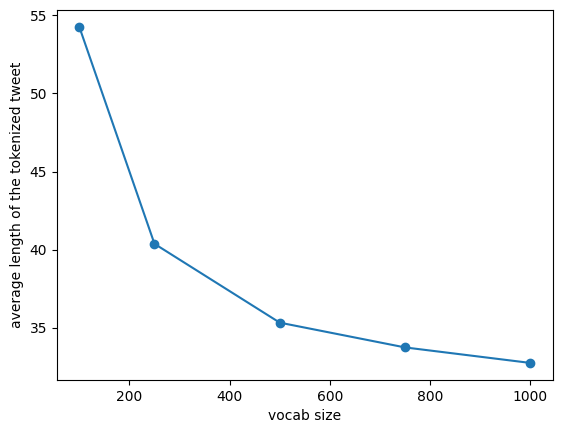

In [265]:
import matplotlib.pyplot as plt
import os

corpus = []
for file in os.listdir('data'):
    with open(os.path.join('data', file), 'r') as file:
        for line in file: corpus.append(line.strip())

vocab_sizes = [100, 250, 500, 750, 1000]
avgs = []

for vocab_size in vocab_sizes:
    tokenizer = BPETokenizer(vocab_size)
    tokenizer.train(corpus)
    tokenized_tweets_total_len = 0
    for tweet in corpus:
        tokenized_tweet = tokenizer.tokenize(tweet)
        tokenized_tweets_total_len += len(tokenized_tweet)
    avg_len = tokenized_tweets_total_len / len(corpus)
    avgs.append(avg_len)


plt.plot(vocab_sizes, avgs, marker='o')
plt.xlabel('vocab size')
plt.ylabel('average length of the tokenized tweet')
plt.show()

If the average length of tokenized tweets decreases as the vocabulary size increases, therefore with big vocab size the words are segmented into smaller subword units and this can lead to a loss of semantic meaning. Given this vocab size 500 is preferrable.

### Task 2.3. Analysis on Dataset of Different Language (10 points)

Find a small dataset of texts in a language other than English. The dataset size should be not greater than several megabytes.

Train the BPE tokenizer on the dataset that you found. Try to tokenize the sentences from this dataset with the tokenizer of different `vocab_size`. Plot the dependency of the average length of the tokenized sentence by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized sentence on average.

Tell how the average length of the tokenized sentence differs from the average length of the tokenized tweet. Explain why. 

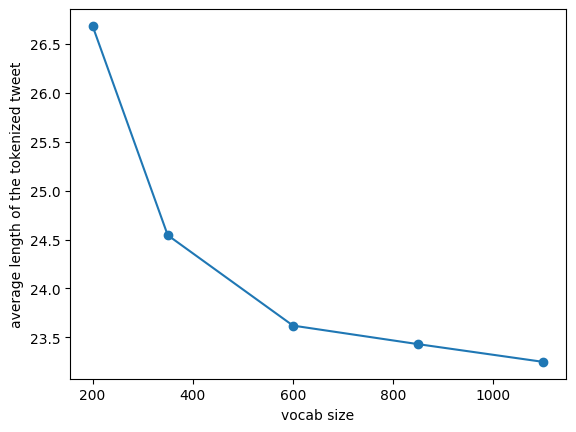

In [266]:
import matplotlib.pyplot as plt
import os

corpus = []
with open(os.path.join('data', 'italian'), 'r') as file:
    for line in file: corpus.append(line.strip())

vocab_sizes = [200, 350, 600, 850, 1100]
avgs = []

for vocab_size in vocab_sizes:
    tokenizer = BPETokenizer(vocab_size)
    tokenizer.train(corpus)
    tokenized_tweets_total_len = 0
    for tweet in corpus:
        tokenized_tweet = tokenizer.tokenize(tweet)
        tokenized_tweets_total_len += len(tokenized_tweet)
    avg_len = tokenized_tweets_total_len / len(corpus)
    avgs.append(avg_len)


plt.plot(vocab_sizes, avgs, marker='o')
plt.xlabel('vocab size')
plt.ylabel('average length of the tokenized italian sentence')
plt.show()

` Tell how the average length of the tokenized sentence differs from the average length of the tokenized tweet. Explain why: `

Avg length of the tokenized sentence is less than avg length of the tokenized tweet because in regular sentences words are likely to be repeated, they don't contain urls and other special symbols which used in tweets.